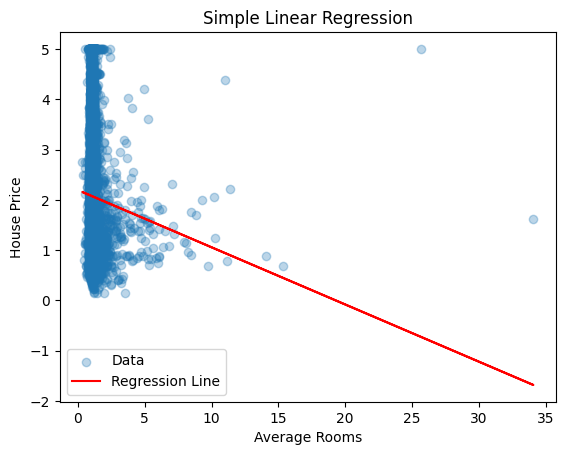

In [1]:
# Part I: Linear Regression
# Task 1: Simple Linear Regression


from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np


data = fetch_california_housing()
X = data.data[:, [3]]  
y = data.target

lr = LinearRegression()
lr.fit(X, y)

coef = lr.coef_[0]
intercept = lr.intercept_


plt.scatter(X, y, alpha=0.3, label="Data")
plt.plot(X, lr.predict(X), color='red', label="Regression Line")
plt.xlabel("Average Rooms")
plt.ylabel("House Price")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

In [2]:
# Task 2: Multiple Linear Regression

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


features = ['AveRooms', 'AveBedrms', 'Population', 'MedInc']
feature_idx = [data.feature_names.index(f) for f in features]
X_multi = data.data[:, feature_idx]


lr_multi = LinearRegression()
lr_multi.fit(X_multi, y)


y_pred = lr_multi.predict(X_multi)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)


for f, c in zip(features, lr_multi.coef_):
    print(f"{f}: {c:.4f}")
print(f"R²: {r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

AveRooms: -0.2386
AveBedrms: 1.0698
Population: -0.0000
MedInc: 0.5362
R²: 0.5101, MSE: 0.6524, RMSE: 0.8077


In [3]:
# Task 3: Feature Scaling and Normalization

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multi)


lr_scaled = LinearRegression()
lr_scaled.fit(X_scaled, y)
y_pred_scaled = lr_scaled.predict(X_scaled)

r2_scaled = r2_score(y, y_pred_scaled)
mse_scaled = mean_squared_error(y, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)

print(f"R² before: {r2:.4f}, after: {r2_scaled:.4f}")
print(f"RMSE before: {rmse:.4f}, after: {rmse_scaled:.4f}")

R² before: 0.5101, after: 0.5101
RMSE before: 0.8077, after: 0.8077


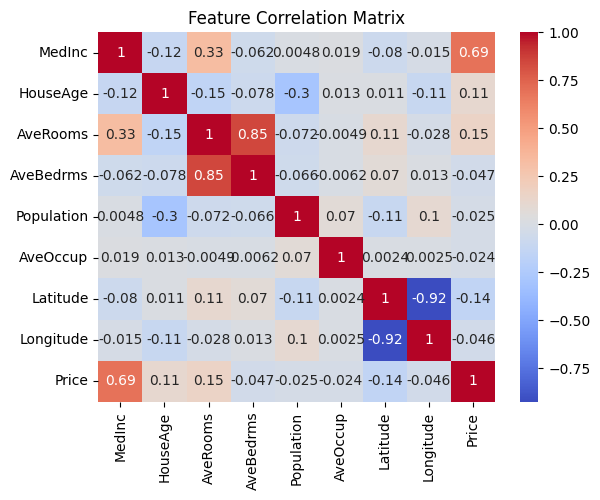

In [4]:
# Task 4: Model Interpretation

import pandas as pd
import seaborn as sns


df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target


corr = df.corr()


sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [5]:
# Task 5: Binary Classification with Logistic Regression

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

clf = LogisticRegression(max_iter=10000)
clf.fit(X_cancer, y_cancer)
y_pred = clf.predict(X_cancer)
y_prob = clf.predict_proba(X_cancer)[:,1]

acc = accuracy_score(y_cancer, y_pred)
cm = confusion_matrix(y_cancer, y_pred)
precision = precision_score(y_cancer, y_pred)
recall = recall_score(y_cancer, y_pred)
f1 = f1_score(y_cancer, y_pred)
roc_auc = roc_auc_score(y_cancer, y_prob)

print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9578, Precision: 0.9587, Recall: 0.9748, F1: 0.9667, ROC-AUC: 0.9947
Confusion Matrix:
[[197  15]
 [  9 348]]


Threshold: 0.3, F1-score: 0.9643
Confusion Matrix:
[[192  20]
 [  6 351]]
Threshold: 0.5, F1-score: 0.9667
Confusion Matrix:
[[197  15]
 [  9 348]]
Threshold: 0.7, F1-score: 0.9673
Confusion Matrix:
[[206   6]
 [ 17 340]]


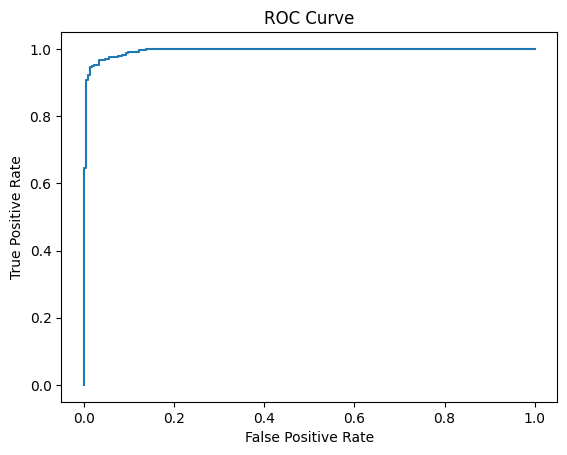

In [6]:
# Task 6: Threshold Tuning and Probability Interpretation

import matplotlib.pyplot as plt


for threshold in [0.3, 0.5, 0.7]:
    y_pred_th = (y_prob >= threshold).astype(int)
    cm_th = confusion_matrix(y_cancer, y_pred_th)
    f1_th = f1_score(y_cancer, y_pred_th)
    print(f"Threshold: {threshold}, F1-score: {f1_th:.4f}")
    print("Confusion Matrix:")
    print(cm_th)

fpr, tpr, _ = roc_curve(y_cancer, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()

In [7]:
# Task 7 (Optional): Multiclass Classification

from sklearn.datasets import load_iris
from sklearn.metrics import classification_report


iris = load_iris()
X_iris = iris.data
y_iris = iris.target

clf_iris = LogisticRegression(multi_class='ovr', max_iter=10000)
clf_iris.fit(X_iris, y_iris)
y_pred_iris = clf_iris.predict(X_iris)

print(classification_report(y_iris, y_pred_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.90      0.93        50
           2       0.91      0.96      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [8]:
# # Part 3 --> General Questions
# 1. What are the assumptions of linear regression?
 
#  Assumptions of Linear Regression:

# Linearity: Relationship between input and output should be straight-line.

# Independence: Data points should not influence each other.

# Homoscedasticity: Errors should have constant spread.

# Normality: Errors should be normally distributed.

# No Multicollinearity: Inputs shouldn’t be too closely related.

In [9]:
# 2. When should you use logistic regression instead of linear regression?
# Use logistic regression when your output (dependent variable) is categorical, especially for binary outcomes like Yes/No, True/False, or 0/1.
# Linear regression is for predicting continuous values, but logistic regression is better when you want to classify things into groups.

In [10]:
# 3. What is the interpretation of coefficients in logistic regression?

# In logistic regression, each coefficient shows how a 1-unit change in the input variable affects the log-odds of the outcome.
# If the coefficient is positive, the odds of the event happening increase.
# If it's negative, the odds decrease.

In [11]:
# 4. What is the difference between sigmoid and softmax functions?

# Sigmoid is used for binary classification. It gives a single output between 0 and 1, showing the probability of one class.

# Softmax is used for multi-class classification. It gives multiple outputs (one for each class), and all outputs add up to 1, representing probabilities for each class.



In [ ]:
# 5. Why is R-squared not suitable for evaluating logistic regression models?
    
#     R-squared is used in linear regression to measure how well the line fits the data (based on actual values).
# But in logistic regression, we’re predicting probabilities and classes, not continuous values, so R-squared doesn’t make sense here.
# Instead, we use things like accuracy, precision, recall, or AUC-ROC to evaluate logistic models.